In [22]:
# import packages
import requests
from bs4 import BeautifulSoup
import json
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import glob
import os
from statistics import mean
import plotly.express as px
from tqdm import tqdm
# nltk.download('vader_lexicon')
# nltk.download('punkt')
# ! jupyter labextension install @jupyter-widgets/jupyterlab-manager jupyterlab-plotly

In [23]:
# find all news articles using beautifulsoup
response = requests.get('https://www.aljazeera.com/where/mozambique/')
soup = BeautifulSoup(response.text, 'lxml')
news = soup.find_all('a', class_ = 'u-clickable-card__link')

In [24]:
# extract ten most recent articles
count = 0
for i in tqdm(range(len(news))):
    if count == 10:
        break
    # follow url to article page
    url = 'https://www.aljazeera.com' + str(news[i]['href'])
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    # find the block with news text
    content = soup.find('div', class_ ="wysiwyg wysiwyg--all-content css-1ck9wyi")
    # skip news that only contains video
    if not content:
        continue
    # preprocessing. only extract news without comments, dates, or ads.
    para = content.find_all('p')
    # combine all elements of news
    final = ' '.join([j.get_text() for j in para])
    count += 1
    # save news in .json files
    with open(str(count-1) + '. ' + str(news[i]['href'].split('/')[-1]) + '.json', 'w') as outfile:
    # with open(str(i['href'].split('/')[-1])+'.json', 'w') as outfile:
        json.dump(final, outfile)


 79%|████████████████████████████████████████████████████████████████▍                 | 11/14 [00:01<00:00,  8.08it/s]


In [25]:
ref = {}
# read all news saved locally
for filename in glob.glob('*.json'):
    with open(os.path.join(os.getcwd(), filename), 'r') as f:
        text = json.load(f)
        sia = SentimentIntensityAnalyzer()
        # get sentiment scores by sentences in each news
        score = [sia.polarity_scores(i)['compound'] for i in nltk.sent_tokenize(text)]
        # save mean sentiment scores to dictionary
        ref[filename] = mean(score)
ref

{'0. floods-hit-south-africas-kwazulu-natal-province-again.json': -0.15685625,
 '1. mozambique-cyclone-gombe-death-toll-rises-to-53.json': -0.7357833333333333,
 '2. mozambique-announces-new-prime-minister-and-finance-minister.json': -0.039425000000000016,
 '3. analysis-can-african-gas-replace-russian-supplies-to-europe.json': 0.1838842105263158,
 '4. at-least-70-dead-from-tropical-storm-ana-in-southern-africa.json': -0.33470526315789473,
 '5. southern-africa-bloc-sadc-extends-mozambique-mission.json': 0.15233636363636363,
 '6. in-mozambique-kagame-says-rwandan-troops-presence-to-continue.json': -0.18054722222222222,
 '7. rwanda-mozambique-forces-recapture-port-city-from-rebels.json': 0.012528571428571434,
 '8. rwanda-deploys-1000-soldiers-to-mozambique-cabo-delgado.json': -0.2630625,
 '9. southern-african-nations-agree-to-deploy-forces-to-mozambique.json': -0.2922}

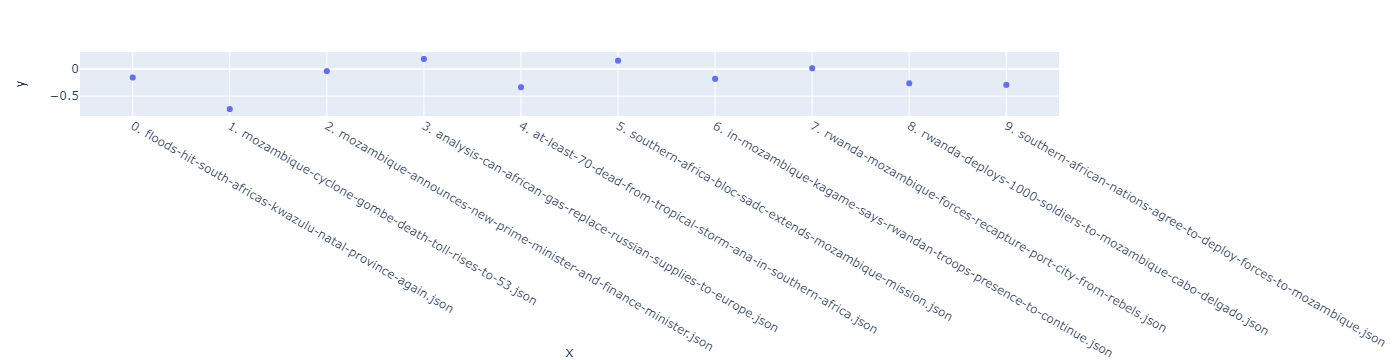

In [26]:
# show scatterplots of sentiments
fig = px.scatter(x=ref.keys(), y=ref.values())
fig.show()